In [1]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load data

In [2]:
data_big_cleaned = pd.read_csv('data/big_cleaned_results.csv', index_col=0)
data_big_cleaned

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,TYPE,CORR,B5_TYPE
0,3.0,5.0,3.0,2.0,3.0,5.0,3.0,5.0,1.0,5.0,...,3.0,1.0,21.0,24.0,32.0,32.0,30.0,0,1.000000,INACO
1,5.0,2.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,...,4.0,5.0,40.0,33.0,20.0,45.0,46.0,1,1.000000,ESTCO
2,4.0,2.0,5.0,4.0,4.0,2.0,2.0,4.0,5.0,5.0,...,5.0,4.0,33.0,41.0,38.0,39.0,40.0,238,0.970845,ESACO
3,1.0,3.0,2.0,4.0,3.0,1.0,2.0,5.0,1.0,5.0,...,5.0,5.0,21.0,13.0,35.0,24.0,50.0,2,1.000000,INARO
4,4.0,2.0,4.0,3.0,4.0,2.0,4.0,1.0,5.0,3.0,...,4.0,5.0,40.0,33.0,43.0,29.0,46.0,3,1.000000,ESACO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424228,1.0,4.0,2.0,4.0,3.0,4.0,1.0,4.0,2.0,4.0,...,5.0,3.0,19.0,19.0,36.0,18.0,38.0,29,0.979314,INARO
424229,2.0,2.0,5.0,3.0,4.0,3.0,3.0,5.0,1.0,5.0,...,4.0,5.0,27.0,40.0,41.0,37.0,45.0,0,0.969519,ESACO
424230,4.0,3.0,5.0,2.0,5.0,2.0,5.0,3.0,4.0,2.0,...,5.0,4.0,41.0,38.0,48.0,38.0,43.0,3,0.988586,ESACO
424231,2.0,1.0,3.0,3.0,5.0,3.0,2.0,3.0,4.0,5.0,...,5.0,5.0,31.0,19.0,32.0,36.0,41.0,9,0.970936,ENACO


# Choose X and Y data

In [3]:
X=data_big_cleaned.iloc[:,:50]
print(X)
Y=data_big_cleaned['TYPE']
print(Y)

        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0        3.0   5.0   3.0   2.0   3.0   5.0   3.0   5.0   1.0    5.0  ...   
1        5.0   2.0   5.0   5.0   5.0   2.0   5.0   5.0   5.0    1.0  ...   
2        4.0   2.0   5.0   4.0   4.0   2.0   2.0   4.0   5.0    5.0  ...   
3        1.0   3.0   2.0   4.0   3.0   1.0   2.0   5.0   1.0    5.0  ...   
4        4.0   2.0   4.0   3.0   4.0   2.0   4.0   1.0   5.0    3.0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
424228   1.0   4.0   2.0   4.0   3.0   4.0   1.0   4.0   2.0    4.0  ...   
424229   2.0   2.0   5.0   3.0   4.0   3.0   3.0   5.0   1.0    5.0  ...   
424230   4.0   3.0   5.0   2.0   5.0   2.0   5.0   3.0   4.0    2.0  ...   
424231   2.0   1.0   3.0   3.0   5.0   3.0   2.0   3.0   4.0    5.0  ...   
424232   3.0   2.0   4.0   3.0   4.0   2.0   5.0   3.0   1.0    5.0  ...   

        OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0        4.0   3.

# Check if Y data is representative

In [4]:
pd.Series(Y).value_counts()

3      146335
0       63638
238     35913
9       29683
4       25279
11      21344
222     14039
29      13388
50      12188
5       11875
7       11001
20       9464
2        9308
1        8500
37       6850
66       5428
Name: TYPE, dtype: int64

# Split data to train and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check if test data is representative

In [6]:
print(pd.Series(y_train).value_counts())

3      116799
0       50982
238     28817
9       23757
4       20194
11      17120
222     11235
29      10727
50       9740
5        9536
7        8830
20       7536
2        7464
1        6827
37       5455
66       4367
Name: TYPE, dtype: int64


In [7]:
print(pd.Series(y_test).value_counts())

3      29536
0      12656
238     7096
9       5926
4       5085
11      4224
222     2804
29      2661
50      2448
5       2339
7       2171
20      1928
2       1844
1       1673
37      1395
66      1061
Name: TYPE, dtype: int64


# Functions for mapping classes from SOM model to classes from Y data

In [8]:
def find_class(predictions, i, mapping):
    
    # list of most common classes
    keys=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().keys().to_list()
    # list of classes counts
    cnts=pd.Series(y_test.tolist())[list(pd.Series(predictions).loc[lambda x : x == i].index)].value_counts().to_list()
    # chosen class
    lbl = None
    # count of chosen class
    cnt = None
    
    # iterate over every class from most common
    for key_id in range(len(keys)):
        # if key is not in mapped classes table
        if keys[key_id] not in mapping.best_classes.values:
            # save class as chosen
            lbl = keys[key_id]
            # save count of class
            cnt = cnts[key_id]
            # save mapping in table
            mapping.at[mapping[mapping['som']==i].index[0], 'counts']=cnt
            mapping.at[mapping[mapping['som']==i].index[0], 'best_classes']=lbl 
            # stop iteration
            break
        # if key is in mapped classes table and count of new class is bigger than previous one
        elif cnts[key_id] > mapping[mapping['best_classes']==keys[key_id]].counts.values[0]:
            # save class as chosen
            lbl = keys[key_id]
            # save count of class
            cnt = cnts[key_id]
            # get previous cluster
            j=mapping[mapping['best_classes']==keys[key_id]].som.values[0]
            index = mapping[mapping['best_classes']==keys[key_id]].index[0]
            # set new values in mapping table
            mapping.at[index, 'counts']=None
            mapping.at[index, 'best_classes']=None
            mapping.at[mapping[mapping['som']==i].index[0], 'counts']=cnt
            mapping.at[mapping[mapping['som']==i].index[0], 'best_classes']=lbl 
            # get new values for previous cluster
            lbl2, cnt2 = find_class(predictions, j, mapping)
            mapping.at[index, 'counts']=cnt2
            mapping.at[index, 'best_classes']=lbl2
            # stop iteration
            break

    return lbl, cnt

In [9]:
def map_class(predictions):
    
    # create table with classes mapping
    d = {'best_classes': pd.Series(pd.Series(predictions).unique()), 'som': pd.Series(pd.Series(predictions).unique())}
    classes_mapping = pd.DataFrame(data=d)
    classes_mapping['best_classes']=None
    classes_mapping['counts']=None
    
    # iterate over clusters
    for i in pd.Series(predictions).unique():
        # fill mapping table
        lbl, cnt = find_class(predictions, i, classes_mapping)
    
    # find classes without cluster
    best_classes=pd.Series(y_test.unique())
    null_classes=best_classes[~best_classes.isin(classes_mapping['best_classes'].values)].values

    # fill clusters withour mapped class with classes without cluster
    i=0
    for index, row in classes_mapping[classes_mapping['best_classes'].isna()].iterrows():
        classes_mapping.at[index, 'best_classes']=null_classes[i]
        i+=1

    return classes_mapping

# sklearn-som

In [10]:
from sklearn_som.som import SOM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.preprocessing import StandardScaler

# Optimize hiperparameters

In [75]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    # Suggest values of the parameters using a trial object.
    param = {
        'm': 4,
        'n': 4,
        'dim': 50,
        'lr': trial.suggest_float('lr', 1e-2, 1, log=True),
        'sigma': trial.suggest_float('sigma', 1e-2, 3, log=True),
        'max_iter': trial.suggest_int('max_iter', 2000, 5000, log=True),
        'random_state': 42, #trial.suggest_int('random_state', 1, 42, log=True),
    }
    
    param2 = {
        'epochs': trial.suggest_int('epochs', 10, 100, log=True),
    }

    # create SOM model
    som = SOM(**param)
    som.fit(x_train.to_numpy(), **param2)
    # get results
    predictions = som.fit_predict(x_test.to_numpy(), **param2)
    classes_mapping=map_class(predictions)
    # change clusters to classes from mapping table
    predictions_fix = predictions.copy()
    for index, row in classes_mapping.iterrows():
        predictions_fix[predictions==classes_mapping.at[index, 'som']]=classes_mapping.at[index, 'best_classes']
    # calculate score
    score = f1_score(y_test, predictions_fix, average='macro')
    return score

# Create a study object and optimize the objective function.
sampler = TPESampler(seed=10)
study = optuna.create_study(sampler=sampler, direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-09-05 17:55:09,879] A new study created in memory with name: no-name-c742d031-a25c-4a28-9ec7-c39e1a0f97db
[I 2023-09-05 17:55:21,252] Trial 0 finished with value: 0.03256645970986869 and parameters: {'lr': 0.3488520557156076, 'sigma': 0.011256544558788804, 'max_iter': 3574, 'epochs': 56}. Best is trial 0 with value: 0.03256645970986869.
[I 2023-09-05 17:55:34,771] Trial 1 finished with value: 0.03256645970986869 and parameters: {'lr': 0.0993148119483195, 'sigma': 0.03604529204778841, 'max_iter': 2398, 'epochs': 57}. Best is trial 0 with value: 0.03256645970986869.
[I 2023-09-05 17:55:50,376] Trial 2 finished with value: 0.03256645970986869 and parameters: {'lr': 0.021788216053884014, 'sigma': 0.01655115978306184, 'max_iter': 3748, 'epochs': 90}. Best is trial 0 with value: 0.03256645970986869.
[I 2023-09-05 17:56:05,730] Trial 3 finished with value: 0.03256645970986869 and parameters: {'lr': 0.010183487453386063, 'sigma': 0.18567880916039234, 'max_iter': 4211, 'epochs': 40}. Be

[I 2023-09-05 18:04:18,248] Trial 35 finished with value: 0.22939524716688683 and parameters: {'lr': 0.08188819204491357, 'sigma': 0.905356844841618, 'max_iter': 3227, 'epochs': 20}. Best is trial 35 with value: 0.22939524716688683.
[I 2023-09-05 18:04:31,538] Trial 36 finished with value: 0.03256645970986869 and parameters: {'lr': 0.09841037476277399, 'sigma': 0.2509517962115024, 'max_iter': 3323, 'epochs': 20}. Best is trial 35 with value: 0.22939524716688683.
[I 2023-09-05 18:04:45,011] Trial 37 finished with value: 0.0770022070572633 and parameters: {'lr': 0.1322144462740847, 'sigma': 0.4104452625207347, 'max_iter': 3539, 'epochs': 14}. Best is trial 35 with value: 0.22939524716688683.
[I 2023-09-05 18:04:59,395] Trial 38 finished with value: 0.15590380638212586 and parameters: {'lr': 0.15808074300829003, 'sigma': 2.0482454212765813, 'max_iter': 3734, 'epochs': 27}. Best is trial 35 with value: 0.22939524716688683.
[I 2023-09-05 18:05:13,373] Trial 39 finished with value: 0.2709945

[I 2023-09-05 18:13:04,964] Trial 71 finished with value: 0.273394510016723 and parameters: {'lr': 0.1867486490537747, 'sigma': 0.6979094839197046, 'max_iter': 3515, 'epochs': 16}. Best is trial 47 with value: 0.30164158673566455.
[I 2023-09-05 18:13:20,561] Trial 72 finished with value: 0.24246199413261343 and parameters: {'lr': 0.23078112657969435, 'sigma': 0.6769624698507302, 'max_iter': 3567, 'epochs': 16}. Best is trial 47 with value: 0.30164158673566455.
[I 2023-09-05 18:13:34,695] Trial 73 finished with value: 0.22625058661990766 and parameters: {'lr': 0.133435809329563, 'sigma': 0.5798384682088399, 'max_iter': 3464, 'epochs': 15}. Best is trial 47 with value: 0.30164158673566455.
[I 2023-09-05 18:13:49,125] Trial 74 finished with value: 0.26378911745802175 and parameters: {'lr': 0.14704270116111212, 'sigma': 0.6943704898856158, 'max_iter': 3725, 'epochs': 16}. Best is trial 47 with value: 0.30164158673566455.
[I 2023-09-05 18:14:02,995] Trial 75 finished with value: 0.077538954

In [76]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [77]:
from optuna.trial import TrialState

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  0
  Number of complete trials:  100
Best trial:
  Value:  0.30164158673566455
  Params: 
    lr: 0.1389558848949938
    sigma: 0.697649120407503
    max_iter: 3730
    epochs: 26


# Train model

In [65]:
# {'lr': 0.1389558848949938, 'sigma': 0.697649120407503, 'max_iter': 3730, 'epochs': 26}
som = SOM(m=4, n=4, dim=50, lr=0.1389558848949938, sigma=0.697649120407503, max_iter=3730, random_state=42)
%time som.fit(x_train.to_numpy(), epochs=26)
predictions = som.fit_predict(x_test.to_numpy(), epochs=26)

CPU times: user 8.27 s, sys: 3.22 ms, total: 8.28 s
Wall time: 8.27 s


In [66]:
pd.Series(predictions).value_counts()

3     7087
2     6032
7     5827
5     5591
10    5487
14    5462
9     5371
8     5306
6     5102
12    4966
0     4937
1     4852
15    4814
11    4799
4     4619
13    4595
dtype: int64

# Map classes from som to classes from Y data

In [67]:
# get classes mapping
classes_mapping=map_class(predictions)
# create copy of output
predictions_fix = predictions.copy()
# change clusters to classes from mapping table
for index, row in classes_mapping.iterrows():
    predictions_fix[predictions==classes_mapping.at[index, 'som']]=classes_mapping.at[index, 'best_classes']

# Check the resuts

In [68]:
print(classification_report(y_test,predictions_fix))

              precision    recall  f1-score   support

           0       0.59      0.25      0.35     12656
           1       0.02      0.08      0.03      1673
           2       0.12      0.31      0.17      1844
           3       0.98      0.20      0.33     29536
           4       0.47      0.42      0.44      5085
           5       0.39      0.83      0.53      2339
           7       0.12      0.28      0.16      2171
           9       0.61      0.50      0.55      5926
          11       0.54      0.58      0.56      4224
          20       0.02      0.04      0.02      1928
          29       0.27      0.55      0.36      2661
          37       0.23      0.82      0.36      1395
          50       0.35      0.71      0.47      2448
          66       0.00      0.00      0.00      1061
         222       0.04      0.08      0.06      2804
         238       0.41      0.41      0.41      7096

    accuracy                           0.32     84847
   macro avg       0.32   

0.3508071226493593
[29536, 12656, 7096, 5926, 5085, 4224, 2804, 2661, 2448, 2339, 2171, 1928, 1844, 1673, 1395, 1061]
[0.33248987854251016, 0.3508071226493593, 0.41429880843263067, 0.5471328671328671, 0.44394064303380054, 0.5597006463317835, 0.05741165118803521, 0.3584882432598793, 0.4693297224102911, 0.5327857631759069, 0.1637020195265481, 0.022343396728288334, 0.17392610393511565, 0.03493333333333334, 0.36497518809028334, 0.0]


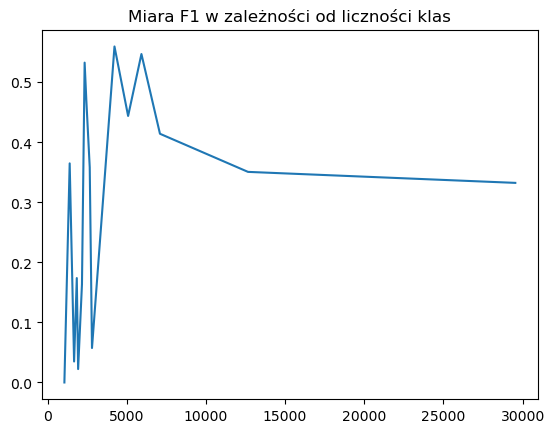

In [69]:
rep=classification_report(y_test,predictions_fix, output_dict=True)
print(rep['0']['f1-score'])
x=[cnt for cnt in pd.Series(y_test).value_counts().to_list()]
y=[rep[str(i)]['f1-score'] for i in pd.Series(y_test).value_counts().keys().to_list()]
print(x)
print(y)

plt.title('Miara F1 w zależności od liczności klas')
plt.plot(x,y)
plt.show()
    

In [70]:
score = f1_score(y_test, predictions_fix, average='weighted')
score

0.35193733073472705

In [71]:
accuracy_score(y_test, predictions_fix)

0.3239713837849305

In [72]:
f1_score(y_test, predictions_fix, average='macro')

0.30164158673566455

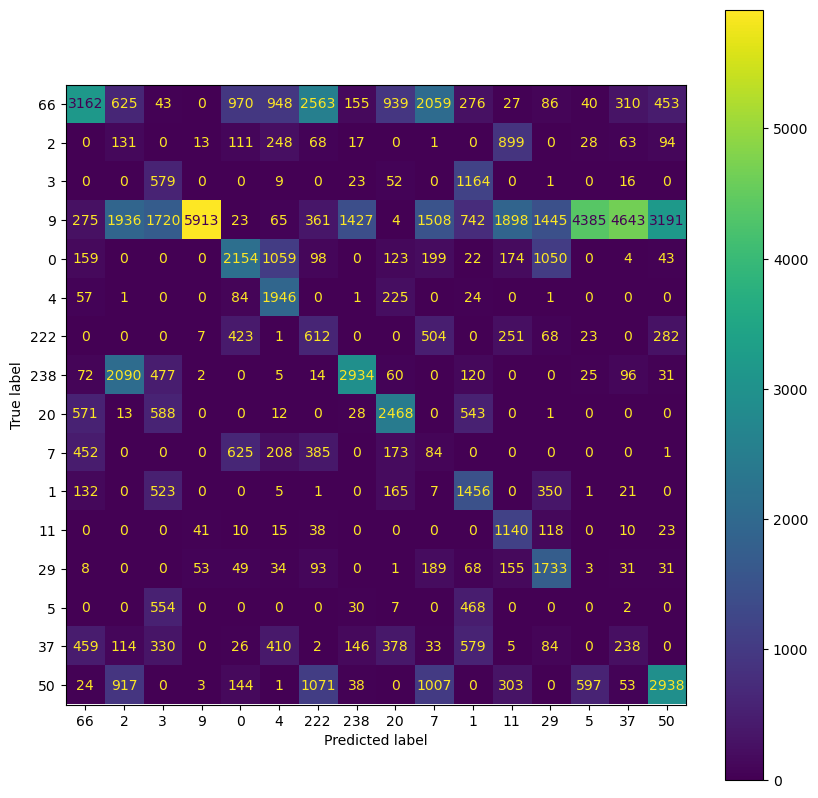

In [73]:
f, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, predictions_fix, labels=y_test.unique())
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions_fix, display_labels=y_test.unique(), ax=ax)

In [74]:
pd.Series(predictions_fix).value_counts()

238    7087
3      6032
1      5827
20     5591
222    5487
29     5462
0      5371
7      5306
66     5102
5      4966
50     4937
37     4852
2      4814
9      4799
4      4619
11     4595
dtype: int64

# Somoclu

In [54]:
import somoclu
from mpl_toolkits.mplot3d import Axes3D


# Optimize hiperparameters

In [59]:
def get_labels(som2):
    grid_labels = [tuple(grid_label) for grid_label in som2.bmus]
    unique_labels = [
        tuple(grid_label) for grid_label in np.unique(grid_labels, axis=0)
    ]
    # Generate mapping
    labels_mapping = {
        grid_label: cluster_label
        for grid_label, cluster_label in zip(
            unique_labels, range(len(unique_labels))
        )
    }
    labels = np.array(
        [labels_mapping[grid_label] for grid_label in grid_labels]
    )
    predictions2=pd.Series(labels)
    return predictions2

def objective2(trial):
    # Suggest values of the parameters using a trial object.
    param = {
        'n_columns': 4,
        'n_rows': 4,
        'initialcodebook': None,
        'kerneltype': 0, 
        'maptype': "planar",
        'gridtype': trial.suggest_categorical("gridtype", ["rectangular", "hexagonal"]), 
        'compactsupport': True, 
        'neighborhood': "gaussian",
        'std_coeff': trial.suggest_float('std_coeff', 1e-2, 3, log=True),
        'initialization': trial.suggest_categorical("initialization", ["random", "pca", None]),  
        'verbose': 0, # trial.suggest_categorical("verbose", [0, 1, 2]),  
    }
    
    param2 = {
        'epochs': trial.suggest_int('epochs', 10, 100, log=True),
        'radius0': trial.suggest_float('radius0', 1, 5000, log=True),
        'radiusN': 1,
        'radiuscooling': trial.suggest_categorical("radiuscooling", ["linear", "exponential"]),
        'scale0': trial.suggest_float('scale0', 1e-2, 1, log=True),
        'scaleN': trial.suggest_float('scaleN', 1e-3, 1e-1, log=True),
        'scalecooling': trial.suggest_categorical("scalecooling", ["linear", "exponential"]),
    }
    
    # create SOM model
    som2 = somoclu.Somoclu(**param)
    som2.train(np.float32(x_train.to_numpy()), **param2)
    som2.train(np.float32(x_test.to_numpy()), **param2)
    # get results
    predictions2 = get_labels(som2)
    classes_mapping2=map_class(predictions2)
    # change clusters to classes from mapping table
    predictions_fix2 = predictions2.copy()
    for index, row in classes_mapping2.iterrows():
        predictions_fix2[predictions2==classes_mapping2.at[index, 'som']]=classes_mapping2.at[index, 'best_classes']
    # calculate score
    score = f1_score(y_test, predictions_fix2, average='macro')
    return score

# Create a study object and optimize the objective function.
sampler2 = TPESampler(seed=10)
study2 = optuna.create_study(sampler=sampler2, direction='maximize')
study2.optimize(objective2, n_trials=300)

[I 2023-09-04 21:57:46,088] A new study created in memory with name: no-name-b4342bcb-2757-4d96-bceb-f1ff83791c9d
[I 2023-09-04 21:57:51,550] Trial 0 finished with value: 0.16327813806991695 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.3712132853191884, 'initialization': 'random', 'epochs': 15, 'radius0': 650.3996393990318, 'radiuscooling': 'linear', 'scale0': 0.23481164807395874, 'scaleN': 0.08068386469121067, 'scalecooling': 'exponential'}. Best is trial 0 with value: 0.16327813806991695.
[I 2023-09-04 21:58:05,538] Trial 1 finished with value: 0.24462012407703815 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.613585993818488, 'initialization': 'pca', 'epochs': 34, 'radius0': 3.3564697817624753, 'radiuscooling': 'exponential', 'scale0': 0.07650086554079967, 'scaleN': 0.007379517834505111, 'scalecooling': 'linear'}. Best is trial 1 with value: 0.24462012407703815.
[I 2023-09-04 21:58:13,401] Trial 2 finished with value: 0.21020834192164806 and parameters: {'g

[I 2023-09-04 22:09:08,169] Trial 21 finished with value: 0.3165858694041924 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.02036626540841865, 'initialization': 'random', 'epochs': 98, 'radius0': 3355.8473307466297, 'radiuscooling': 'exponential', 'scale0': 0.40383197279432315, 'scaleN': 0.03265260653317916, 'scalecooling': 'linear'}. Best is trial 11 with value: 0.31800961635518343.
[I 2023-09-04 22:09:53,161] Trial 22 finished with value: 0.31685895211113 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.010067948770598837, 'initialization': 'random', 'epochs': 84, 'radius0': 69.57974714946901, 'radiuscooling': 'exponential', 'scale0': 0.6794304743952356, 'scaleN': 0.03503650818472312, 'scalecooling': 'linear'}. Best is trial 11 with value: 0.31800961635518343.
[I 2023-09-04 22:10:35,623] Trial 23 finished with value: 0.31517589918968075 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.020123551921079987, 'initialization': 'random', 'epochs': 87, 'radiu

[I 2023-09-04 22:24:40,751] Trial 42 finished with value: 0.31609027303020343 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.02283363352978141, 'initialization': 'random', 'epochs': 87, 'radius0': 454.4682779144191, 'radiuscooling': 'exponential', 'scale0': 0.7470821475607472, 'scaleN': 0.04079211132476331, 'scalecooling': 'linear'}. Best is trial 24 with value: 0.3286419945527277.
[I 2023-09-04 22:25:29,670] Trial 43 finished with value: 0.3179381209054226 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.013426956861744712, 'initialization': 'random', 'epochs': 91, 'radius0': 423.3637656341547, 'radiuscooling': 'exponential', 'scale0': 0.44895292123971453, 'scaleN': 0.06340852719872932, 'scalecooling': 'linear'}. Best is trial 24 with value: 0.3286419945527277.
[I 2023-09-04 22:26:20,547] Trial 44 finished with value: 0.3186561210408282 and parameters: {'gridtype': 'rectangular', 'std_coeff': 0.010132030869321832, 'initialization': 'random', 'epochs': 100, 'radiu

[I 2023-09-04 22:41:40,380] Trial 63 finished with value: 0.2546422052984946 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.015326888343283081, 'initialization': 'pca', 'epochs': 93, 'radius0': 86.05195481501673, 'radiuscooling': 'exponential', 'scale0': 0.8231573167411497, 'scaleN': 0.028021310860447703, 'scalecooling': 'linear'}. Best is trial 24 with value: 0.3286419945527277.
[I 2023-09-04 22:42:37,715] Trial 64 finished with value: 0.29871250808939603 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.019649810862708117, 'initialization': 'pca', 'epochs': 82, 'radius0': 56.08712782023042, 'radiuscooling': 'exponential', 'scale0': 0.6598682004969564, 'scaleN': 0.02210945069985076, 'scalecooling': 'linear'}. Best is trial 24 with value: 0.3286419945527277.
[I 2023-09-04 22:43:14,596] Trial 65 finished with value: 0.31886206451887333 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.011495379221314855, 'initialization': 'pca', 'epochs': 58, 'radius0': 82.047399

[I 2023-09-04 22:54:24,296] Trial 84 finished with value: 0.31984634803577294 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.043233598388608935, 'initialization': 'pca', 'epochs': 43, 'radius0': 139.33245581555357, 'radiuscooling': 'exponential', 'scale0': 0.14102931880964378, 'scaleN': 0.09154866288961275, 'scalecooling': 'exponential'}. Best is trial 24 with value: 0.3286419945527277.
[I 2023-09-04 22:54:52,247] Trial 85 finished with value: 0.3244334488901738 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.041007093100305904, 'initialization': 'pca', 'epochs': 42, 'radius0': 210.8102381770995, 'radiuscooling': 'exponential', 'scale0': 0.13603332119480763, 'scaleN': 0.09193589220491576, 'scalecooling': 'exponential'}. Best is trial 24 with value: 0.3286419945527277.
[I 2023-09-04 22:55:19,734] Trial 86 finished with value: 0.3243118147900279 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.03933965793114788, 'initialization': 'pca', 'epochs': 40, 'radius0':

[I 2023-09-04 23:03:27,405] Trial 105 finished with value: 0.33110235486919454 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.021256687192456224, 'initialization': 'pca', 'epochs': 54, 'radius0': 458.4282612295, 'radiuscooling': 'exponential', 'scale0': 0.10741999101588239, 'scaleN': 0.05993684323014849, 'scalecooling': 'exponential'}. Best is trial 90 with value: 0.3340761820334319.
[I 2023-09-04 23:04:00,222] Trial 106 finished with value: 0.28282430680038906 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.02240150347634388, 'initialization': None, 'epochs': 55, 'radius0': 398.3479541053877, 'radiuscooling': 'exponential', 'scale0': 0.10885454340833257, 'scaleN': 0.05063279802952197, 'scalecooling': 'exponential'}. Best is trial 90 with value: 0.3340761820334319.
[I 2023-09-04 23:04:28,116] Trial 107 finished with value: 0.3328141209533662 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.02072080835740859, 'initialization': 'pca', 'epochs': 52, 'radius0': 5

[I 2023-09-04 23:15:35,688] Trial 126 finished with value: 0.3335967618967491 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.013800309862646718, 'initialization': 'pca', 'epochs': 58, 'radius0': 716.6685122776015, 'radiuscooling': 'exponential', 'scale0': 0.0882636683827956, 'scaleN': 0.04129974556731837, 'scalecooling': 'exponential'}. Best is trial 117 with value: 0.3342175482002941.
[I 2023-09-04 23:16:08,086] Trial 127 finished with value: 0.3342684306284533 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.013878373681698482, 'initialization': 'pca', 'epochs': 60, 'radius0': 728.2607321517326, 'radiuscooling': 'exponential', 'scale0': 0.06400301083145854, 'scaleN': 0.043490207464450384, 'scalecooling': 'exponential'}. Best is trial 127 with value: 0.3342684306284533.
[I 2023-09-04 23:16:39,753] Trial 128 finished with value: 0.33429692885308654 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.014440870348818392, 'initialization': 'pca', 'epochs': 62, 'radi

[I 2023-09-04 23:27:17,670] Trial 147 finished with value: 0.33608269276469416 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010780428666718782, 'initialization': 'pca', 'epochs': 57, 'radius0': 2010.5509107180499, 'radiuscooling': 'exponential', 'scale0': 0.06733993453630618, 'scaleN': 0.029484460372406842, 'scalecooling': 'exponential'}. Best is trial 146 with value: 0.33634960111707.
[I 2023-09-04 23:28:00,733] Trial 148 finished with value: 0.2847324115576123 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010097602868224476, 'initialization': 'pca', 'epochs': 64, 'radius0': 1223.4568777920845, 'radiuscooling': 'exponential', 'scale0': 0.06901772711088372, 'scaleN': 0.026931064265194985, 'scalecooling': 'exponential'}. Best is trial 146 with value: 0.33634960111707.
[I 2023-09-04 23:28:43,647] Trial 149 finished with value: 0.3350958811421365 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010770838626475548, 'initialization': 'pca', 'epochs': 57, 'radi

[I 2023-09-04 23:41:04,890] Trial 168 finished with value: 0.2293005600315134 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.012749404279270175, 'initialization': 'pca', 'epochs': 73, 'radius0': 2831.4715300022094, 'radiuscooling': 'linear', 'scale0': 0.04147534109266965, 'scaleN': 0.022477513597111583, 'scalecooling': 'exponential'}. Best is trial 151 with value: 0.3373909021148113.
[I 2023-09-04 23:41:42,971] Trial 169 finished with value: 0.33562837170119764 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010025776523461505, 'initialization': 'pca', 'epochs': 67, 'radius0': 1846.0446321973343, 'radiuscooling': 'exponential', 'scale0': 0.05431797782249133, 'scaleN': 0.029344172495919342, 'scalecooling': 'exponential'}. Best is trial 151 with value: 0.3373909021148113.
[I 2023-09-04 23:42:21,646] Trial 170 finished with value: 0.2783106313385705 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010928934522600296, 'initialization': 'pca', 'epochs': 70, 'radiu

[I 2023-09-04 23:54:33,451] Trial 189 finished with value: 0.2884711095518353 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.013838154902725441, 'initialization': 'pca', 'epochs': 66, 'radius0': 3854.8484771698436, 'radiuscooling': 'exponential', 'scale0': 0.061040565253269584, 'scaleN': 0.028233027100484195, 'scalecooling': 'exponential'}. Best is trial 151 with value: 0.3373909021148113.
[I 2023-09-04 23:55:06,154] Trial 190 finished with value: 0.28560034249038535 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.01000230178407128, 'initialization': 'pca', 'epochs': 62, 'radius0': 3215.2240116336047, 'radiuscooling': 'exponential', 'scale0': 0.0669829912942303, 'scaleN': 0.03459477006376006, 'scalecooling': 'exponential'}. Best is trial 151 with value: 0.3373909021148113.
[I 2023-09-04 23:55:39,870] Trial 191 finished with value: 0.3342174297989745 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.012802021574543179, 'initialization': 'pca', 'epochs': 70, 'ra

[I 2023-09-05 00:06:43,909] Trial 210 finished with value: 0.28614215448093716 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.013379749284231175, 'initialization': 'pca', 'epochs': 59, 'radius0': 2014.7064351542572, 'radiuscooling': 'exponential', 'scale0': 0.04672979050641558, 'scaleN': 0.03323681625939122, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 00:07:18,828] Trial 211 finished with value: 0.3343258287171338 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.012058067878756334, 'initialization': 'pca', 'epochs': 64, 'radius0': 1521.372951383964, 'radiuscooling': 'exponential', 'scale0': 0.06937746986676029, 'scaleN': 0.030945386289952803, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 00:07:52,004] Trial 212 finished with value: 0.3360096144837518 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.012347638037122632, 'initialization': 'pca', 'epochs': 61, 'ra

[I 2023-09-05 14:44:01,269] Trial 231 finished with value: 0.27922080120653014 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.012790433201856775, 'initialization': 'pca', 'epochs': 64, 'radius0': 1879.3218041220516, 'radiuscooling': 'exponential', 'scale0': 0.05779180419552924, 'scaleN': 0.038124253965473996, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 14:44:38,031] Trial 232 finished with value: 0.281638643556156 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.011489832551422888, 'initialization': 'pca', 'epochs': 61, 'radius0': 1614.1489057453202, 'radiuscooling': 'exponential', 'scale0': 0.05923037561043771, 'scaleN': 0.03496691128026669, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 14:45:16,647] Trial 233 finished with value: 0.31593480498129023 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.014223115550934478, 'initialization': 'pca', 'epochs': 63, 'r

[I 2023-09-05 14:55:09,660] Trial 252 finished with value: 0.3338260032411884 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.013189985790895621, 'initialization': 'pca', 'epochs': 69, 'radius0': 2013.6672377214654, 'radiuscooling': 'exponential', 'scale0': 0.05693448057300486, 'scaleN': 0.02200902429825612, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 14:55:41,322] Trial 253 finished with value: 0.33216594314440684 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.011078766639044304, 'initialization': 'pca', 'epochs': 64, 'radius0': 1191.0473080456773, 'radiuscooling': 'exponential', 'scale0': 0.07297366711514996, 'scaleN': 0.03429444375566672, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 14:56:08,947] Trial 254 finished with value: 0.3318305488049497 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.016579069532048622, 'initialization': 'pca', 'epochs': 57, 'ra

[I 2023-09-05 15:05:03,776] Trial 273 finished with value: 0.302080608895852 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.10017806031273162, 'initialization': 'pca', 'epochs': 52, 'radius0': 1188.1922456684858, 'radiuscooling': 'exponential', 'scale0': 0.06253482859248195, 'scaleN': 0.01933829476158213, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 15:05:35,839] Trial 274 finished with value: 0.3243661272231959 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.01201026548350302, 'initialization': 'pca', 'epochs': 58, 'radius0': 4165.619371692468, 'radiuscooling': 'exponential', 'scale0': 0.04945989005557664, 'scaleN': 0.02056790867723719, 'scalecooling': 'exponential'}. Best is trial 204 with value: 0.3378801354351434.
[I 2023-09-05 15:06:11,472] Trial 275 finished with value: 0.3349976221223767 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010883263661357475, 'initialization': 'pca', 'epochs': 60, 'radius0

[I 2023-09-05 15:17:24,518] Trial 294 finished with value: 0.2847684618356887 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.01002192725019115, 'initialization': 'random', 'epochs': 71, 'radius0': 4955.735781231386, 'radiuscooling': 'exponential', 'scale0': 0.07769472845999675, 'scaleN': 0.01723945069564219, 'scalecooling': 'exponential'}. Best is trial 293 with value: 0.3411157876088221.
[I 2023-09-05 15:17:52,543] Trial 295 finished with value: 0.31763236651701754 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.012024023520055029, 'initialization': 'random', 'epochs': 67, 'radius0': 4.763907145655338, 'radiuscooling': 'exponential', 'scale0': 0.0893583897451825, 'scaleN': 0.014329104283236041, 'scalecooling': 'exponential'}. Best is trial 293 with value: 0.3411157876088221.
[I 2023-09-05 15:18:35,176] Trial 296 finished with value: 0.2907146427644263 and parameters: {'gridtype': 'hexagonal', 'std_coeff': 0.010017792464223131, 'initialization': 'random', 'epochs': 7

In [60]:
fig = optuna.visualization.plot_optimization_history(study2)
fig.show()

In [61]:
from optuna.trial import TrialState

pruned_trials = study2.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study2.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study2.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial2 = study2.best_trial

print("  Value: ", trial2.value)

print("  Params: ")
for key, value in trial2.params.items():
    print("    {}: {}".format(key, value))

Study statistics: 
  Number of finished trials:  300
  Number of pruned trials:  0
  Number of complete trials:  300
Best trial:
  Value:  0.3411157876088221
  Params: 
    gridtype: hexagonal
    std_coeff: 0.010027094275395014
    initialization: random
    epochs: 72
    radius0: 26.54454156002509
    radiuscooling: exponential
    scale0: 0.07477695179393117
    scaleN: 0.016923357143479697
    scalecooling: exponential


# Train model

In [108]:
# {'gridtype': 'hexagonal', 'std_coeff': 0.010027094275395014, 'initialization': 'random', 'epochs': 72, 'radius0': 26.54454156002509, 'radiuscooling': 'exponential', 'scale0': 0.07477695179393117, 'scaleN': 0.016923357143479697, 'scalecooling': 'exponential'}
som2 = somoclu.Somoclu(4, 4, initialcodebook=None, kerneltype=0, maptype='planar', gridtype='hexagonal', compactsupport=True, neighborhood='gaussian', std_coeff=0.010027094275395014, initialization='random', verbose=0)
%time som2.train(np.float32(x_train.to_numpy()), epochs=26, radius0=26.54454156002509, radiuscooling='exponential', scale0=0.07477695179393117, scaleN=0.016923357143479697, scalecooling='exponential')
som2.train(np.float32(x_test.to_numpy()), epochs=26, radius0=26.54454156002509, radiuscooling='exponential', scale0=0.07477695179393117, scaleN=0.016923357143479697, scalecooling='exponential')

CPU times: user 47 s, sys: 235 ms, total: 47.2 s
Wall time: 7.8 s


# Predict

In [93]:
# som2.train(np.float32(x_test.to_numpy()), epochs=10)

# Get labels (from som-learn)

In [94]:
def get_labels(som2):
    grid_labels = [tuple(grid_label) for grid_label in som2.bmus]
    unique_labels = [
        tuple(grid_label) for grid_label in np.unique(grid_labels, axis=0)
    ]
    # Generate mapping
    labels_mapping = {
        grid_label: cluster_label
        for grid_label, cluster_label in zip(
            unique_labels, range(len(unique_labels))
        )
    }
    labels = np.array(
        [labels_mapping[grid_label] for grid_label in grid_labels]
    )
    predictions2=pd.Series(labels)
    return predictions2

In [95]:
predictions2 = get_labels(som2)

In [96]:
predictions2.value_counts()

10    7027
13    6486
12    6271
11    5736
3     5684
7     5553
0     5542
8     5497
4     5330
14    5074
1     4923
9     4685
6     4578
2     4526
15    4064
5     3871
dtype: int64

# Map classes from som to classes from Y data

In [97]:
# get classes mapping
classes_mapping2=map_class(predictions2)
# create copy of output
predictions_fix2 = predictions2.copy()
# change clusters to classes from mapping table
for index, row in classes_mapping2.iterrows():
    predictions_fix2[predictions2==classes_mapping2.at[index, 'som']]=classes_mapping2.at[index, 'best_classes']

# Check the results

In [98]:
print(classification_report(y_test,predictions_fix2))

              precision    recall  f1-score   support

           0       0.62      0.25      0.35     12656
           1       0.36      0.84      0.51      1673
           2       0.24      0.74      0.37      1844
           3       0.97      0.19      0.32     29536
           4       0.20      0.22      0.21      5085
           5       0.50      0.86      0.63      2339
           7       0.03      0.07      0.04      2171
           9       0.46      0.43      0.45      5926
          11       0.40      0.54      0.46      4224
          20       0.31      0.73      0.43      1928
          29       0.20      0.48      0.28      2661
          37       0.09      0.31      0.14      1395
          50       0.27      0.51      0.35      2448
          66       0.09      0.39      0.14      1061
         222       0.03      0.07      0.04      2804
         238       0.43      0.43      0.43      7096

    accuracy                           0.33     84847
   macro avg       0.33   

[29536, 12656, 7096, 5926, 5085, 4224, 2804, 2661, 2448, 2339, 2171, 1928, 1844, 1673, 1395, 1061]
[0.31617146745293717, 0.3530738860688099, 0.42979536925582384, 0.4483780955702825, 0.20922320922320925, 0.4646750100928542, 0.0411194833153929, 0.2832512315270936, 0.35354397950469685, 0.6315789473684211, 0.03946140514598054, 0.434149364735048, 0.36771664188184394, 0.5075757575757576, 0.14046052631578948, 0.14004010695187166]


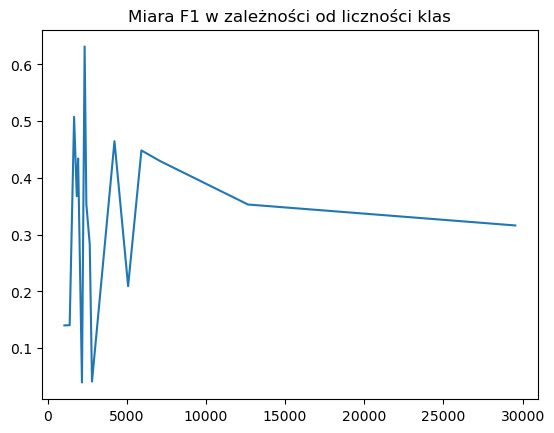

In [99]:
rep2=classification_report(y_test,predictions_fix2, output_dict=True)
x=[cnt for cnt in pd.Series(y_test).value_counts().to_list()]
y=[rep2[str(i)]['f1-score'] for i in pd.Series(y_test).value_counts().keys().to_list()]
print(x)
print(y)

plt.title('Miara F1 w zależności od liczności klas')
plt.plot(x,y)
plt.show()

In [100]:
score = f1_score(y_test, predictions_fix2, average='weighted')
score

0.33645027098721203

In [101]:
accuracy_score(y_test, predictions_fix2)

0.32532676464695276

In [102]:
f1_score(y_test, predictions_fix2, average='macro')

0.3225134051241133

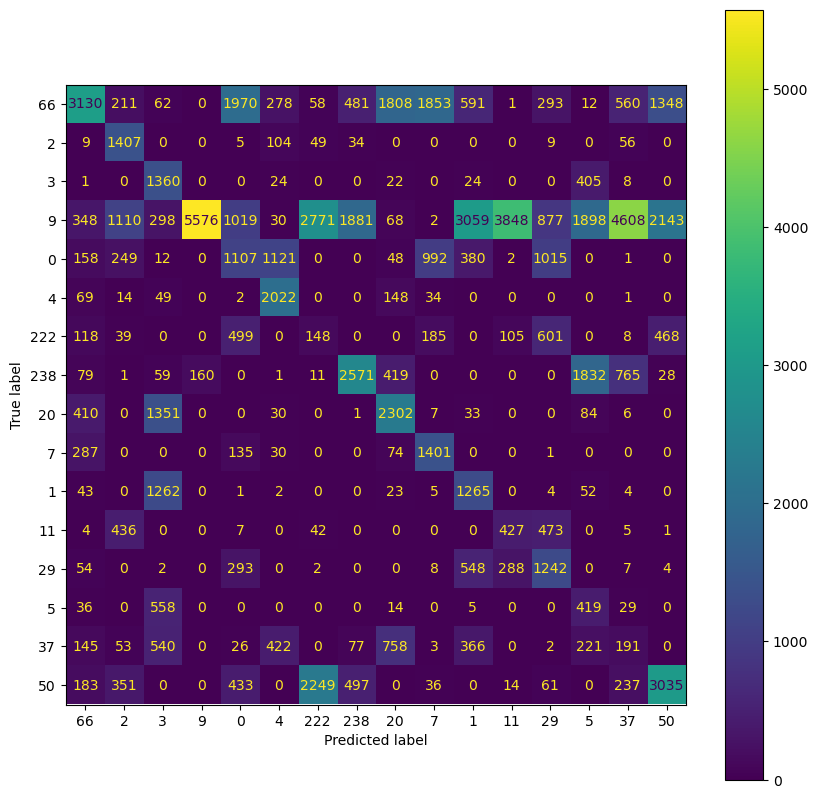

In [103]:
f, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, predictions_fix2, labels=y_test.unique())
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions_fix2, display_labels=y_test.unique(), ax=ax)

In [104]:
pd.Series(predictions_fix2).value_counts()

238    7027
222    6486
29     6271
3      5736
11     5684
2      5553
9      5542
4      5497
7      5330
0      5074
66     4923
37     4685
50     4578
20     4526
5      4064
1      3871
dtype: int64